In [185]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def draw_schematic(total_depth, objects, objects_top_depths, number_of_zones, zones_names, zone_depths):
    
    def draw_zone(top, bottom):
        for i in np.linspace(top,bottom,10):
            ax.axhline(i, color = 'black', xmin = 0.25, xmax = 0.34, lw = 0.4)
            ax.axhline(i, color = 'black', xmin = 0.64, xmax = 0.86, lw = 0.4)
    
    # initiate the graphs
    fig = plt.figure(frameon=False, figsize = (5,10))
    ax = fig.add_subplot(111)

    top_ref = (total_depth - 300)/total_depth

    # Adding casing and surface Level
    ax.axvline(0, color='black', ymax = top_ref)
    ax.axvline(100, color='black', ymax = top_ref)
    ax.axhline(300, color = 'black')


    # Adding objects
    for object_dh, depth in zip(objects, objects_top_depths):
        
        ex1, ex2 = 6, 92
        
        if object_dh in ['Bridge Plug', 'packer']:
            offset = 80
        else:
            offset = 200

        img_path = object_dh + '.png'
        img = mpimg.imread(img_path)
        ax.imshow(img, extent=[ex1, ex2, depth, depth + offset])
        ax.annotate(object_dh, xy =(150, depth), xytext =(150, depth+40), color = 'blue')

    # Adding object
    img_path = 'wellhead.png'
    img = mpimg.imread(img_path)
    ax.imshow(img, extent=[-100, 230, 300,0])

    # Adding object
    img_path = 'tubing.png'
    img = mpimg.imread(img_path)
    ax.imshow(img, extent=[25, 75, 300, objects_top_depths[-1]])


    # x & y axis adjustments
    ax.set_ylim([0,total_depth+5])
    ax.set_xlim([-120,220])
    ax.invert_yaxis()
    ax.tick_params(axis='x', which='both', length=0, labelbottom=False)
    ax.set_frame_on(False)
    ax.tick_params(axis='y', which='both', left = True, labelbottom=False)
        
    # Putting depths
    objects_top_depths.append(total_depth)
    main_depths = objects_top_depths
    
    plt.yticks(main_depths)

    # Dotted lines for depths
    for depth in main_depths:
        ax.axhline(depth, color = 'red', ls = '--', xmin = 0, xmax = 0.34, lw = 0.8)

    # Adding perforation
    for j in range(0, number_of_zones*2, 2):
        draw_zone(zone_depths[j], zone_depths[j+1])
    
    k = 0
    for j in range(0, len(zone_depths), 2):
        locate = (zone_depths[j] + zone_depths[j+1]) / 2
        ax.annotate(zones_names[k], xy =(180, locate), xytext =(180, locate), color = 'green')
        k+=1
    
    k = 0
    for j in zone_depths:
        ax.annotate(str(j), xy =(-120, j), xytext =(-120, j), color = 'crimson')
        k+=1
    
    plt.show()

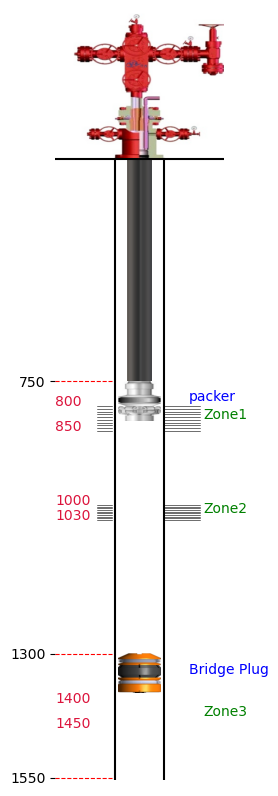

In [189]:
draw_schematic(total_depth = 1550,
               objects = ['Bridge Plug', 'packer'],
               objects_top_depths = [1300, 750],
               number_of_zones = 2,
               zones_names = ['Zone1', 'Zone2', 'Zone3'],
               zone_depths = [800, 850, 1000, 1030, 1400, 1450])

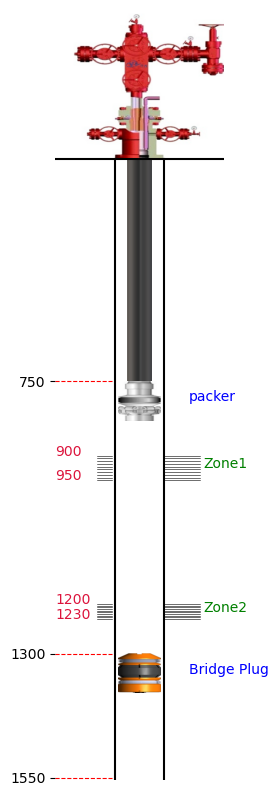

In [193]:
draw_schematic(total_depth = 1550,
               objects = ['Bridge Plug', 'packer'],
               objects_top_depths = [1300, 750],
               number_of_zones = 2,
               zones_names = ['Zone1', 'Zone2'],
               zone_depths = [900, 950, 1200, 1230])